In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.metrics import peak_signal_noise_ratio as psnr

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


100%|██████████| 13/13 [00:24<00:00,  1.85s/it]


Epoch [1/100] | Generator Loss: 0.0687


100%|██████████| 13/13 [00:24<00:00,  1.85s/it]


Epoch [2/100] | Generator Loss: 0.0254


100%|██████████| 13/13 [00:24<00:00,  1.87s/it]


Epoch [3/100] | Generator Loss: 0.0209


100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


Epoch [4/100] | Generator Loss: 0.0126


100%|██████████| 13/13 [00:24<00:00,  1.85s/it]


Epoch [5/100] | Generator Loss: 0.0161


100%|██████████| 13/13 [00:23<00:00,  1.83s/it]


Epoch [6/100] | Generator Loss: 0.0123


100%|██████████| 13/13 [00:23<00:00,  1.81s/it]


Epoch [7/100] | Generator Loss: 0.0123


100%|██████████| 13/13 [00:23<00:00,  1.81s/it]


Epoch [8/100] | Generator Loss: 0.0128


100%|██████████| 13/13 [00:23<00:00,  1.83s/it]


Epoch [9/100] | Generator Loss: 0.0138


100%|██████████| 13/13 [00:23<00:00,  1.83s/it]


Epoch [10/100] | Generator Loss: 0.0131


100%|██████████| 13/13 [00:24<00:00,  1.86s/it]


Epoch [11/100] | Generator Loss: 0.0112


100%|██████████| 13/13 [00:23<00:00,  1.85s/it]


Epoch [12/100] | Generator Loss: 0.0098


100%|██████████| 13/13 [00:24<00:00,  1.86s/it]


Epoch [13/100] | Generator Loss: 0.0062


100%|██████████| 13/13 [00:23<00:00,  1.84s/it]


Epoch [14/100] | Generator Loss: 0.0079


100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


Epoch [15/100] | Generator Loss: 0.0054


100%|██████████| 13/13 [00:24<00:00,  1.90s/it]


Epoch [16/100] | Generator Loss: 0.0075


100%|██████████| 13/13 [00:24<00:00,  1.87s/it]


Epoch [17/100] | Generator Loss: 0.0060


100%|██████████| 13/13 [00:23<00:00,  1.82s/it]


Epoch [18/100] | Generator Loss: 0.0063


100%|██████████| 13/13 [00:23<00:00,  1.82s/it]


Epoch [19/100] | Generator Loss: 0.0072


100%|██████████| 13/13 [00:23<00:00,  1.81s/it]


Epoch [20/100] | Generator Loss: 0.0070


100%|██████████| 13/13 [00:23<00:00,  1.82s/it]


Epoch [21/100] | Generator Loss: 0.0048


100%|██████████| 13/13 [00:23<00:00,  1.84s/it]


Epoch [22/100] | Generator Loss: 0.0063


100%|██████████| 13/13 [00:23<00:00,  1.82s/it]


Epoch [23/100] | Generator Loss: 0.0068


100%|██████████| 13/13 [00:23<00:00,  1.82s/it]


Epoch [24/100] | Generator Loss: 0.0073


100%|██████████| 13/13 [00:23<00:00,  1.83s/it]


Epoch [25/100] | Generator Loss: 0.0080


100%|██████████| 13/13 [00:23<00:00,  1.83s/it]


Epoch [26/100] | Generator Loss: 0.0058


100%|██████████| 13/13 [00:23<00:00,  1.84s/it]


Epoch [27/100] | Generator Loss: 0.0055


100%|██████████| 13/13 [00:23<00:00,  1.84s/it]


Epoch [28/100] | Generator Loss: 0.0064


100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


Epoch [29/100] | Generator Loss: 0.0056


100%|██████████| 13/13 [00:24<00:00,  1.88s/it]


Epoch [30/100] | Generator Loss: 0.0063


100%|██████████| 13/13 [00:24<00:00,  1.88s/it]


Epoch [31/100] | Generator Loss: 0.0057


100%|██████████| 13/13 [00:24<00:00,  1.90s/it]


Epoch [32/100] | Generator Loss: 0.0054


100%|██████████| 13/13 [00:24<00:00,  1.88s/it]


Epoch [33/100] | Generator Loss: 0.0047


100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


Epoch [34/100] | Generator Loss: 0.0048


100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


Epoch [35/100] | Generator Loss: 0.0030


100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


Epoch [36/100] | Generator Loss: 0.0054


100%|██████████| 13/13 [00:24<00:00,  1.88s/it]


Epoch [37/100] | Generator Loss: 0.0036


100%|██████████| 13/13 [00:24<00:00,  1.90s/it]


Epoch [38/100] | Generator Loss: 0.0056


100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


Epoch [39/100] | Generator Loss: 0.0056


100%|██████████| 13/13 [00:24<00:00,  1.88s/it]


Epoch [40/100] | Generator Loss: 0.0047


100%|██████████| 13/13 [00:24<00:00,  1.90s/it]


Epoch [41/100] | Generator Loss: 0.0054


100%|██████████| 13/13 [00:24<00:00,  1.88s/it]


Epoch [42/100] | Generator Loss: 0.0051


100%|██████████| 13/13 [00:24<00:00,  1.88s/it]


Epoch [43/100] | Generator Loss: 0.0056


100%|██████████| 13/13 [00:24<00:00,  1.88s/it]


Epoch [44/100] | Generator Loss: 0.0068


100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


Epoch [45/100] | Generator Loss: 0.0039


100%|██████████| 13/13 [00:24<00:00,  1.86s/it]


Epoch [46/100] | Generator Loss: 0.0052


100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


Epoch [47/100] | Generator Loss: 0.0040


100%|██████████| 13/13 [00:24<00:00,  1.88s/it]


Epoch [48/100] | Generator Loss: 0.0047


100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


Epoch [49/100] | Generator Loss: 0.0041


100%|██████████| 13/13 [00:24<00:00,  1.91s/it]


Epoch [50/100] | Generator Loss: 0.0040


100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


Epoch [51/100] | Generator Loss: 0.0043


100%|██████████| 13/13 [00:25<00:00,  1.93s/it]


Epoch [52/100] | Generator Loss: 0.0035


100%|██████████| 13/13 [00:24<00:00,  1.90s/it]


Epoch [53/100] | Generator Loss: 0.0053


100%|██████████| 13/13 [01:00<00:00,  4.68s/it]


Epoch [54/100] | Generator Loss: 0.0042


100%|██████████| 13/13 [01:28<00:00,  6.80s/it]


Epoch [55/100] | Generator Loss: 0.0031


100%|██████████| 13/13 [00:23<00:00,  1.84s/it]


Epoch [56/100] | Generator Loss: 0.0035


100%|██████████| 13/13 [00:24<00:00,  1.86s/it]


Epoch [57/100] | Generator Loss: 0.0040


100%|██████████| 13/13 [00:24<00:00,  1.90s/it]


Epoch [58/100] | Generator Loss: 0.0030


100%|██████████| 13/13 [00:45<00:00,  3.47s/it]


Epoch [59/100] | Generator Loss: 0.0032


100%|██████████| 13/13 [00:23<00:00,  1.84s/it]


Epoch [60/100] | Generator Loss: 0.0031


100%|██████████| 13/13 [00:37<00:00,  2.89s/it]


Epoch [61/100] | Generator Loss: 0.0031


100%|██████████| 13/13 [00:23<00:00,  1.83s/it]


Epoch [62/100] | Generator Loss: 0.0032


100%|██████████| 13/13 [00:23<00:00,  1.84s/it]


Epoch [63/100] | Generator Loss: 0.0039


100%|██████████| 13/13 [00:23<00:00,  1.84s/it]


Epoch [64/100] | Generator Loss: 0.0047


100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


Epoch [65/100] | Generator Loss: 0.0037


100%|██████████| 13/13 [00:24<00:00,  1.88s/it]


Epoch [66/100] | Generator Loss: 0.0040


100%|██████████| 13/13 [00:25<00:00,  1.92s/it]


Epoch [67/100] | Generator Loss: 0.0031


100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


Epoch [68/100] | Generator Loss: 0.0031


100%|██████████| 13/13 [00:24<00:00,  1.88s/it]


Epoch [69/100] | Generator Loss: 0.0029


100%|██████████| 13/13 [00:24<00:00,  1.87s/it]


Epoch [70/100] | Generator Loss: 0.0042


100%|██████████| 13/13 [00:24<00:00,  1.90s/it]


Epoch [71/100] | Generator Loss: 0.0027


100%|██████████| 13/13 [00:24<00:00,  1.91s/it]


Epoch [72/100] | Generator Loss: 0.0029


100%|██████████| 13/13 [00:31<00:00,  2.43s/it]


Epoch [73/100] | Generator Loss: 0.0039


100%|██████████| 13/13 [00:24<00:00,  1.87s/it]


Epoch [74/100] | Generator Loss: 0.0027


100%|██████████| 13/13 [00:24<00:00,  1.90s/it]


Epoch [75/100] | Generator Loss: 0.0045


100%|██████████| 13/13 [00:54<00:00,  4.22s/it]


Epoch [76/100] | Generator Loss: 0.0027


100%|██████████| 13/13 [01:18<00:00,  6.02s/it]


Epoch [77/100] | Generator Loss: 0.0031


100%|██████████| 13/13 [00:24<00:00,  1.88s/it]


Epoch [78/100] | Generator Loss: 0.0027


100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


Epoch [79/100] | Generator Loss: 0.0033


100%|██████████| 13/13 [00:29<00:00,  2.26s/it]


Epoch [80/100] | Generator Loss: 0.0031


100%|██████████| 13/13 [00:25<00:00,  1.93s/it]


Epoch [81/100] | Generator Loss: 0.0031


100%|██████████| 13/13 [00:25<00:00,  1.94s/it]


Epoch [82/100] | Generator Loss: 0.0041


100%|██████████| 13/13 [00:25<00:00,  1.94s/it]


Epoch [83/100] | Generator Loss: 0.0031


100%|██████████| 13/13 [00:24<00:00,  1.92s/it]


Epoch [84/100] | Generator Loss: 0.0034


100%|██████████| 13/13 [00:24<00:00,  1.92s/it]


Epoch [85/100] | Generator Loss: 0.0027


100%|██████████| 13/13 [00:50<00:00,  3.91s/it]


Epoch [86/100] | Generator Loss: 0.0029


100%|██████████| 13/13 [01:05<00:00,  5.07s/it]


Epoch [87/100] | Generator Loss: 0.0032


100%|██████████| 13/13 [00:24<00:00,  1.91s/it]


Epoch [88/100] | Generator Loss: 0.0033


100%|██████████| 13/13 [00:24<00:00,  1.91s/it]


Epoch [89/100] | Generator Loss: 0.0032


100%|██████████| 13/13 [00:24<00:00,  1.91s/it]


Epoch [90/100] | Generator Loss: 0.0038


100%|██████████| 13/13 [00:24<00:00,  1.89s/it]


Epoch [91/100] | Generator Loss: 0.0033


100%|██████████| 13/13 [00:24<00:00,  1.91s/it]


Epoch [92/100] | Generator Loss: 0.0029


100%|██████████| 13/13 [00:25<00:00,  1.93s/it]


Epoch [93/100] | Generator Loss: 0.0029


100%|██████████| 13/13 [00:24<00:00,  1.91s/it]


Epoch [94/100] | Generator Loss: 0.0039


100%|██████████| 13/13 [00:33<00:00,  2.54s/it]


Epoch [95/100] | Generator Loss: 0.0033


100%|██████████| 13/13 [00:24<00:00,  1.87s/it]


Epoch [96/100] | Generator Loss: 0.0028


100%|██████████| 13/13 [00:24<00:00,  1.87s/it]


Epoch [97/100] | Generator Loss: 0.0035


100%|██████████| 13/13 [00:24<00:00,  1.90s/it]


Epoch [98/100] | Generator Loss: 0.0028


100%|██████████| 13/13 [00:42<00:00,  3.25s/it]


Epoch [99/100] | Generator Loss: 0.0018


100%|██████████| 13/13 [00:24<00:00,  1.86s/it]


Epoch [100/100] | Generator Loss: 0.0050
PSNR Noisy: 16.23, PSNR Generated: 28.53


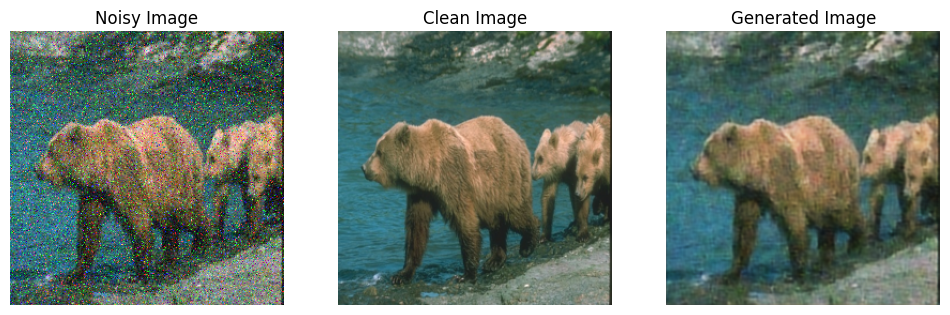

PSNR Noisy: 16.28, PSNR Generated: 30.80


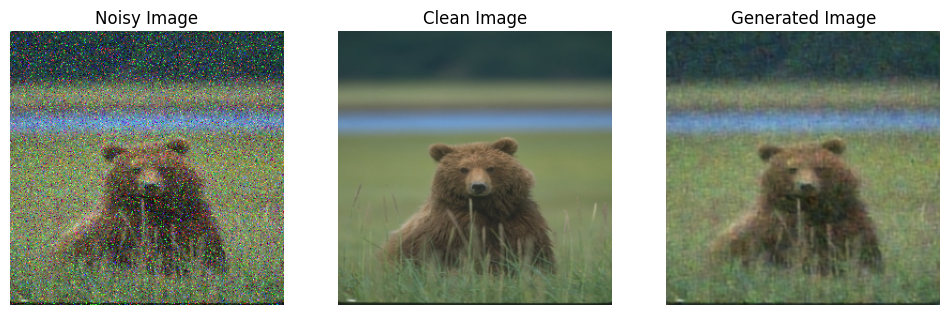

PSNR Noisy: 15.99, PSNR Generated: 24.39


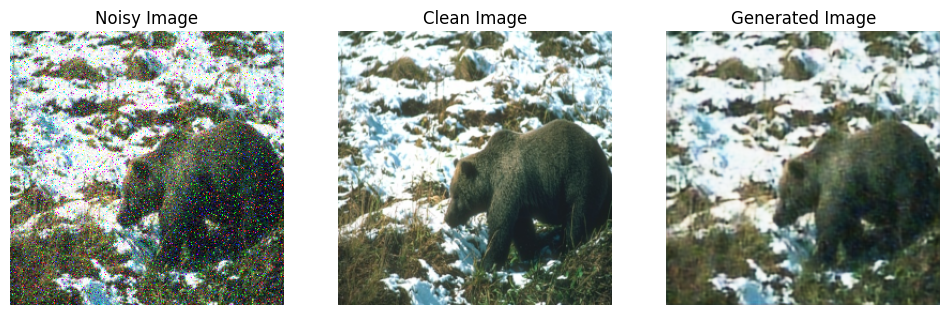

PSNR Noisy: 16.26, PSNR Generated: 29.03


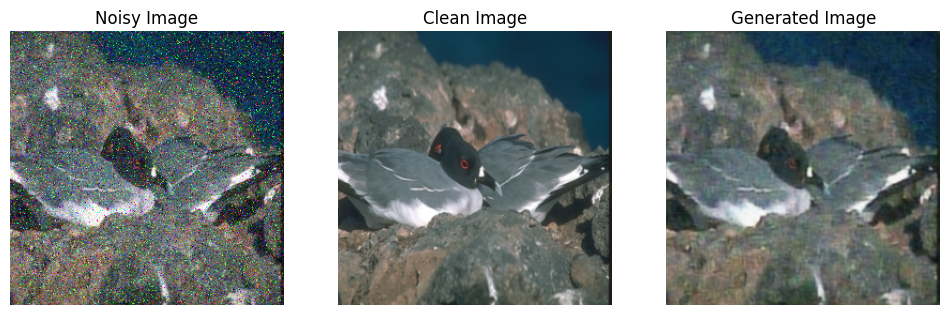

PSNR Noisy: 16.34, PSNR Generated: 28.47


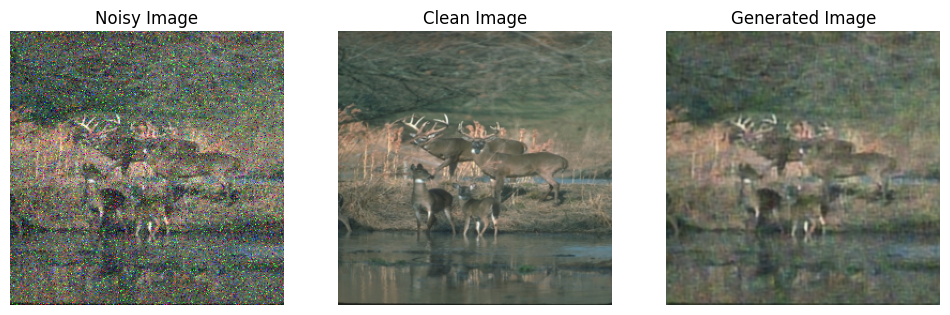

In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from tqdm import tqdm
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

# Configuration du périphérique
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset pour le débruitage avec bruit combiné
class DenoisingDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.image_paths = [
            os.path.join(root_dir, img) for img in os.listdir(root_dir)
            if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))
        ]
        if not self.image_paths:
            raise ValueError(f"Aucune image valide trouvée dans le répertoire: {root_dir}")
        self.transform = transform

    def add_combined_noise(self, image, mean=0, std=0.1, prob_sp=0.05):
        # Bruit gaussien
        noise_gaussian = torch.randn_like(image) * std + mean
        noisy_image = torch.clamp(image + noise_gaussian, 0, 1)

        # Bruit sel et poivre
        salt_pepper = torch.rand_like(image)
        noisy_image[salt_pepper < (prob_sp / 2)] = 0  # Sel (noir)
        noisy_image[salt_pepper > 1 - (prob_sp / 2)] = 1  # Poivre (blanc)

        return noisy_image

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        noisy_image = self.add_combined_noise(image)
        return noisy_image, image


# Transformations pour le dataset
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Chargement du dataset BSD500
train_dataset = DenoisingDataset(root_dir='archive/images/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Définition du générateur (CGNet complet)
class CGNet(nn.Module):
    def __init__(self):
        super(CGNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True)
        )

        self.middle = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.middle(x)
        x = self.decoder(x)
        return x


# Fonction de perte basée sur les hautes fréquences
def high_frequency_loss(input_image, target_image):
    kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    kernel = torch.tensor(kernel, dtype=torch.float32, device=device).unsqueeze(0).unsqueeze(0)

    input_high = []
    target_high = []

    for channel in range(3):
        input_channel = input_image[:, channel:channel+1, :, :]
        target_channel = target_image[:, channel:channel+1, :, :]

        input_high_channel = nn.functional.conv2d(input_channel, kernel, padding=1)
        target_high_channel = nn.functional.conv2d(target_channel, kernel, padding=1)

        input_high.append(input_high_channel)
        target_high.append(target_high_channel)

    input_high = torch.cat(input_high, dim=1)
    target_high = torch.cat(target_high, dim=1)

    return nn.MSELoss()(input_high, target_high)

# Initialisation du générateur
generator = CGNet().to(device)

# Critères et optimiseurs
pixelwise_loss = nn.MSELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)

# Entraînement
num_epochs = 100
for epoch in range(num_epochs):
    generator.train()
    for noisy_imgs, clean_imgs in tqdm(train_loader):
        noisy_imgs = noisy_imgs.to(device)
        clean_imgs = clean_imgs.to(device)

        optimizer_G.zero_grad()
        generated_imgs = generator(noisy_imgs)

        g_loss_pixelwise = pixelwise_loss(generated_imgs, clean_imgs)
        g_loss_high_freq = high_frequency_loss(generated_imgs, clean_imgs)
        g_loss = g_loss_pixelwise + 0.1 * g_loss_high_freq

        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] | Generator Loss: {g_loss.item():.4f}")

# Sauvegarde du modèle
torch.save(generator.state_dict(), 'cgnet_combinaison.pth')

# Fonction pour afficher les échantillons
def show_sample_with_metrics(generator, dataset, index):
    generator.eval()

    noisy_img, clean_img = dataset[index]
    noisy_img = noisy_img.unsqueeze(0).to(device)
    clean_img = clean_img.unsqueeze(0).to(device)

    with torch.no_grad():
        generated_img = generator(noisy_img)

    psnr_noisy = psnr(clean_img.squeeze().permute(1, 2, 0).cpu().numpy(), noisy_img.squeeze().permute(1, 2, 0).cpu().numpy())
    psnr_generated = psnr(clean_img.squeeze().permute(1, 2, 0).cpu().numpy(), generated_img.squeeze().permute(1, 2, 0).cpu().numpy())

    print(f"PSNR Noisy: {psnr_noisy:.2f}, PSNR Generated: {psnr_generated:.2f}")

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title("Noisy Image")
    plt.imshow(noisy_img.squeeze().permute(1, 2, 0).cpu().numpy())
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Clean Image")
    plt.imshow(clean_img.squeeze().permute(1, 2, 0).cpu().numpy())
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Generated Image")
    plt.imshow(generated_img.squeeze().permute(1, 2, 0).cpu().numpy())
    plt.axis('off')

    plt.show()

for idx in range(5):
    show_sample_with_metrics(generator, train_dataset, idx)
